# Import Libraries

In [30]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

In [31]:
DATA_PATH = "Data/data.json"

In [32]:
def load_data(data_path):
    
    with open(data_path, "r") as fp:
        data = json.load(fp)
    
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    return X,y 

In [33]:
def plot_history(history):
    
    fig, axs = plt.subplots(2, figsize=(15,10))
    
    # create accuracy subplot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")
                  
    # create error subplot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")
    
    plt.show()
    

In [34]:
def prepare_datasets(test_size, validation_size):
    
    # load data
    X, y = load_data(DATA_PATH)
    
    # create trai/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    
    # create train/validation split
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)
    
    return X_train, X_validation, X_test, y_train, y_validation, y_test

In [35]:
def build_model(input_shape):
    """Generates RNN-LSTM model"""
    
    # create model
    model = keras.Sequential()
    
    # 2 LSTM layers
    model.add(keras.layers.LSTM(64, input_shape=input_shape, return_sequences=True))
    model.add(keras.layers.LSTM(64))
    
    # dense layer
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))
    
    # output layer
    model.add(keras.layers.Dense(10, activation='softmax'))
    
    return model

In [36]:
X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)

In [37]:
input_shape = (X_train.shape[1], X_train.shape[2]) # 130m 13
model = build_model(input_shape)

In [38]:
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, 
             loss="sparse_categorical_crossentropy",
             metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 130, 64)           19968     
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 57,802
Trainable params: 57,802
Non-trainable params: 0
_________________________________________________________________


In [39]:
history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=30)

Epoch 1/30
188/188 [==============================] - 27s 141ms/step - loss: 2.2110 - accuracy: 0.1940 - val_loss: 2.0854 - val_accuracy: 0.3017
Epoch 2/30
188/188 [==============================] - 23s 124ms/step - loss: 1.9887 - accuracy: 0.3138 - val_loss: 1.8549 - val_accuracy: 0.3738
Epoch 3/30
188/188 [==============================] - 28s 149ms/step - loss: 1.7814 - accuracy: 0.3747 - val_loss: 1.6829 - val_accuracy: 0.4112
Epoch 4/30
188/188 [==============================] - 27s 143ms/step - loss: 1.6557 - accuracy: 0.4109 - val_loss: 1.5942 - val_accuracy: 0.4499
Epoch 5/30
188/188 [==============================] - 25s 135ms/step - loss: 1.5577 - accuracy: 0.4452 - val_loss: 1.5222 - val_accuracy: 0.4780
Epoch 6/30
188/188 [==============================] - 30s 159ms/step - loss: 1.4881 - accuracy: 0.4737 - val_loss: 1.4745 - val_accuracy: 0.4920
Epoch 7/30
188/188 [==============================] - 44s 232ms/step - loss: 1.4409 - accuracy: 0.4937 - val_loss: 1.4331 - val_ac

In [40]:
model.save('RNN_LTSM_model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: RNN_LTSM_model/assets


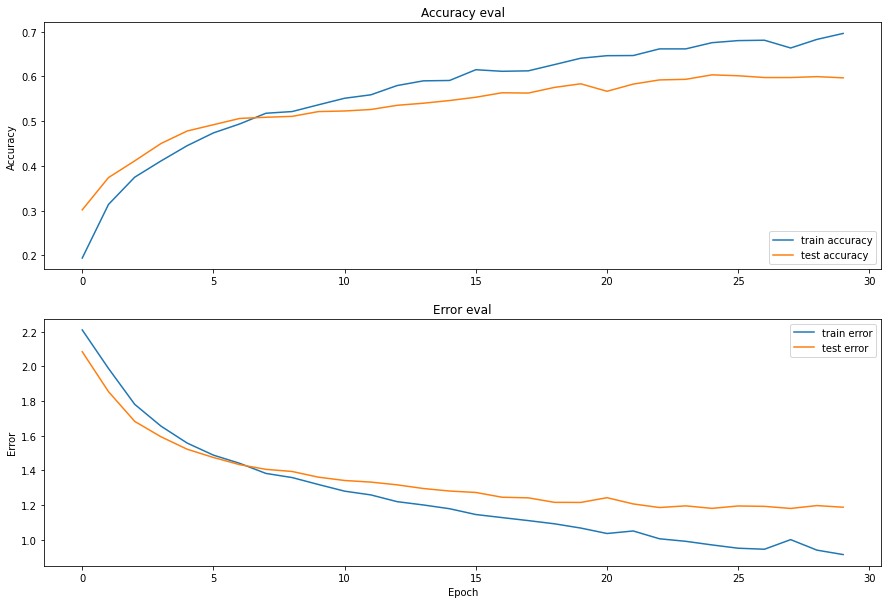

In [41]:
plot_history(history)

In [42]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

79/79 - 2s - loss: 1.0702 - accuracy: 0.6239

Test accuracy: 0.6239487528800964
